In [672]:
import numpy as np # библиотека расширенной математики
import matplotlib as mp # библиотека рисования растровых графиков
import sklearn as sk # библиотека методов машинного обучения
import scipy as sp # библиотека научных уравнений и констант
import seaborn as sns
# создаём короткие псевдонимы
from matplotlib import pyplot as plt
from sklearn import linear_model as LM
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2s

#import matplotlib.pyplot as plt

#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
print('Numpy version: ' + np.__version__)
print('Pandas version: ' + pd.__version__)

%matplotlib inline

Numpy version: 1.23.5
Pandas version: 1.5.3


In [673]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [674]:
data = pd.read_csv('/content/drive/MyDrive/Finashka/CNYRUB_TOM3.csv')
data

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,CNYRUB_TOM,D,03/01/20,00:00:00,8.8840,8.9260,8.8840,8.8840,2233000
1,CNYRUB_TOM,D,06/01/20,00:00:00,8.9260,8.9380,8.8680,8.8680,1310000
2,CNYRUB_TOM,D,08/01/20,00:00:00,8.9299,8.9319,8.8680,8.8761,920000
3,CNYRUB_TOM,D,09/01/20,00:00:00,8.8780,8.8780,8.8226,8.8586,180821000
4,CNYRUB_TOM,D,10/01/20,00:00:00,8.8345,8.8739,8.8081,8.8440,81655000
...,...,...,...,...,...,...,...,...,...
941,CNYRUB_TOM,D,25/09/23,00:00:00,13.1650,13.1900,13.1070,13.1440,11423538000
942,CNYRUB_TOM,D,26/09/23,00:00:00,13.1440,13.1710,13.1230,13.1490,10845905000
943,CNYRUB_TOM,D,27/09/23,00:00:00,13.1500,13.2130,13.1500,13.2130,7337069000
944,CNYRUB_TOM,D,28/09/23,00:00:00,13.2200,13.3270,13.2140,13.3080,7734936000


In [675]:
data.rename(index=str, columns={'<DATE>': 'date', '<OPEN>': 'Open','<VOL>': 'Vol','<HIGH>': 'High','<LOW>': 'Low','<CLOSE>': 'Close' }, inplace=True)
data.head()

,<TICKER>,<PER>,date,<TIME>,Open,High,Low,Close,Vol
0,CNYRUB_TOM,D,03/01/20,00:00:00,8.8840,8.9260,8.8840,8.8840,2233000
1,CNYRUB_TOM,D,06/01/20,00:00:00,8.9260,8.9380,8.8680,8.8680,1310000
2,CNYRUB_TOM,D,08/01/20,00:00:00,8.9299,8.9319,8.8680,8.8761,920000
3,CNYRUB_TOM,D,09/01/20,00:00:00,8.8780,8.8780,8.8226,8.8586,180821000
4,CNYRUB_TOM,D,10/01/20,00:00:00,8.8345,8.8739,8.8081,8.8440,81655000


In [676]:
data = data.drop(['<TICKER>', '<PER>','<TIME>'], axis=1)
data

,date,Open,High,Low,Close,Vol
0,03/01/20,8.8840,8.9260,8.8840,8.8840,2233000
1,06/01/20,8.9260,8.9380,8.8680,8.8680,1310000
2,08/01/20,8.9299,8.9319,8.8680,8.8761,920000
3,09/01/20,8.8780,8.8780,8.8226,8.8586,180821000
4,10/01/20,8.8345,8.8739,8.8081,8.8440,81655000
...,...,...,...,...,...,...
941,25/09/23,13.1650,13.1900,13.1070,13.1440,11423538000
942,26/09/23,13.1440,13.1710,13.1230,13.1490,10845905000
943,27/09/23,13.1500,13.2130,13.1500,13.2130,7337069000
944,28/09/23,13.2200,13.3270,13.2140,13.3080,7734936000


In [677]:
data.describe(include='all')

,date,Open,High,Low,Close,Vol
count,946,946.000000,946.000000,946.000000,946.000000,9.460000e+02
unique,946,NaN,NaN,NaN,NaN,NaN
top,03/01/20,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,10.976073,11.073759,10.863452,10.969313,2.881667e+09
std,NaN,1.641757,1.691190,1.533352,1.599416,4.048004e+09
min,NaN,7.828000,8.090000,7.501100,7.830000,9.200000e+05
25%,NaN,10.011500,10.161150,9.935025,10.063500,6.845300e+07
50%,NaN,11.263200,11.325200,11.207500,11.272000,1.668225e+08
75%,NaN,11.604050,11.669275,11.530075,11.604450,6.111787e+09


In [678]:
for column in data.columns:
  missing = np.mean(data[column].isna()*100)
  print(f" {column} : {round(missing,1)}%")

 date : 0.0%
 Open : 0.0%
 High : 0.0%
 Low : 0.0%
 Close : 0.0%
 Vol : 0.0%


In [679]:
data["date"] = pd.to_datetime(data["date"])
data["date"]

0     2020-03-01
1     2020-06-01
2     2020-08-01
3     2020-09-01
4     2020-10-01
         ...    
941   2023-09-25
942   2023-09-26
943   2023-09-27
944   2023-09-28
945   2023-09-29
Name: date, Length: 946, dtype: datetime64[ns]

In [680]:
data[data["Vol"]==0]

,date,Open,High,Low,Close,Vol


In [681]:
data[data["High"]==data["Low"]]

,date,Open,High,Low,Close,Vol


<Axes: xlabel='Close'>

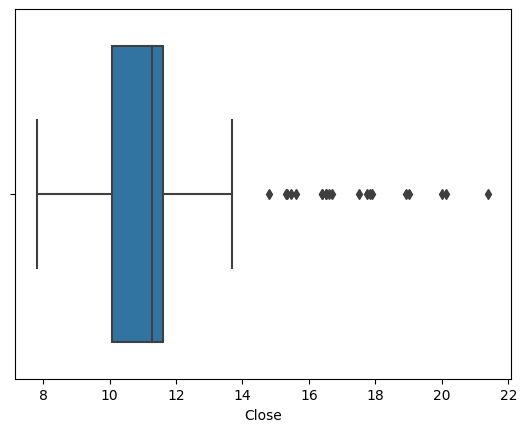

In [682]:
sns.boxplot(x = data['Close'])

<ipython-input-683-4f497bd1ee33>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt='.3f', cmap = 'flare', ax=ax);


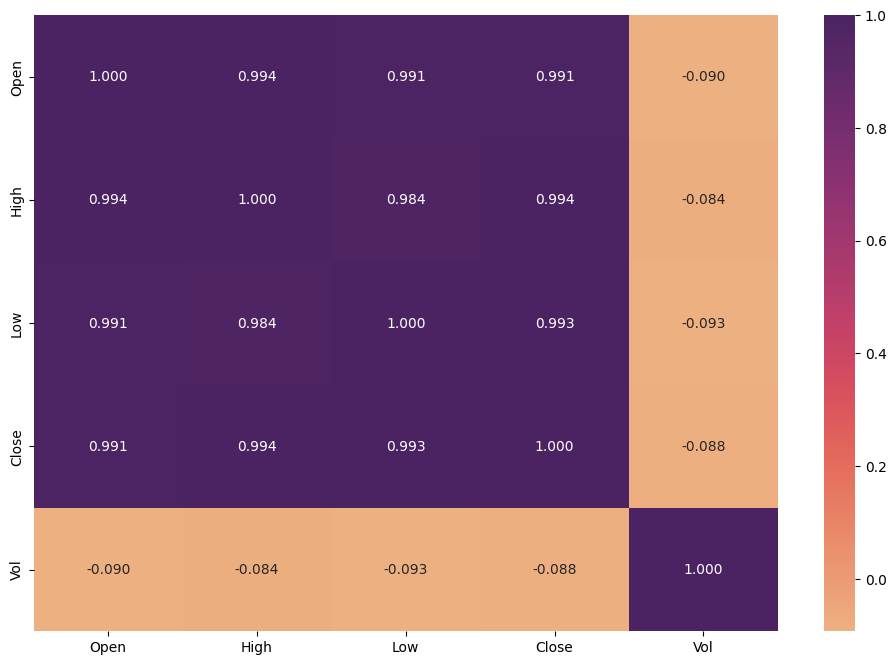

In [683]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt='.3f', cmap = 'flare', ax=ax);

In [684]:
data_new = pd.DataFrame(data['Close'])
data_new

,Close
0,8.8840
1,8.8680
2,8.8761
3,8.8586
4,8.8440
...,...
941,13.1440
942,13.1490
943,13.2130
944,13.3080


In [685]:
#data_new=pd.to_numeric(data_new['Close'], errors='coerce')
#data_new.index

In [686]:
X = data['date'].astype(int).values.reshape(-1, 1)  # Convert date to timestamp
y = data['Close'].values  # Assuming the column name is USDCNY, adjust if it's different

In [687]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [688]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=1)
reg.fit(X_train, y_train)

Lasso(alpha=1)

In [689]:
Lasso(alpha=1)

Lasso(alpha=1)

In [690]:
print('R squared training set', round(reg.score(X_train, y_train)*100, 2))
print('R squared test set', round(reg.score(X_test, y_test)*100, 2))

R squared training set 1.92
R squared test set 0.61


In [691]:
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))

MSE training set 2.5
MSE test set 2.53


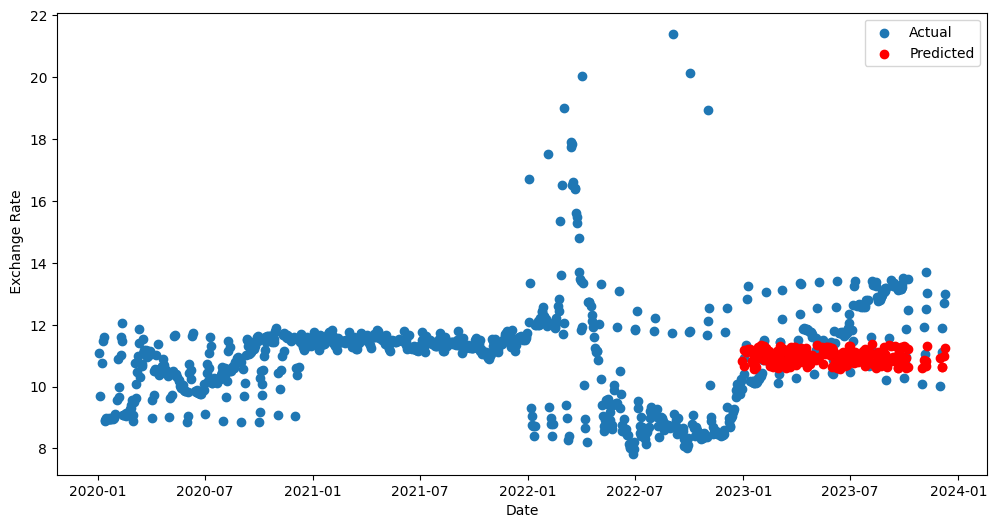

In [692]:
plt.figure(figsize=(12, 6))
plt.scatter(data['date'], data['Close'], label='Actual')
plt.scatter(data['date'][len(X_train):], pred, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel(' Exchange Rate')
plt.legend()
plt.show()

In [693]:
#!pip install openpyxl

In [694]:
#data_new.to_excel('121.xlsx')
#data1 = data_new.to_csv('3.csv', encoding='utf-8')


In [695]:
clo=np.array(data_new['Close'])
clo=clo.reshape(-1, 1)
clo

array([[ 8.884 ],
       [ 8.868 ],
       [ 8.8761],
       [ 8.8586],
       [ 8.844 ],
       [ 8.8901],
       [ 8.9242],
       [ 8.9259],
       [ 8.9719],
       [ 8.9621],
       [ 8.9759],
       [ 8.94  ],
       [ 8.9537],
       [ 8.9416],
       [ 8.968 ],
       [ 9.012 ],
       [ 8.9461],
       [ 8.99  ],
       [ 9.078 ],
       [ 9.118 ],
       [ 9.0659],
       [ 8.9921],
       [ 9.028 ],
       [ 9.0641],
       [ 9.1275],
       [ 9.186 ],
       [ 9.0875],
       [ 9.0599],
       [ 9.08  ],
       [ 9.094 ],
       [ 9.0801],
       [ 9.13  ],
       [ 9.06  ],
       [ 9.1205],
       [ 9.1059],
       [ 9.2901],
       [ 9.31  ],
       [ 9.401 ],
       [ 9.578 ],
       [ 9.5572],
       [ 9.486 ],
       [ 9.574 ],
       [ 9.6428],
       [ 9.8262],
       [10.278 ],
       [10.438 ],
       [10.6059],
       [10.3   ],
       [10.668 ],
       [10.732 ],
       [11.53  ],
       [11.0699],
       [11.192 ],
       [11.168 ],
       [11.057 ],
       [10

In [696]:
'''
fc=365 # задаём глубину прогноза (левая точка кросс-валидации)
al=0.05 # задаём уровень значимости альфа
X=[] # создаем пустой массив значений X
Y=[] # создаем пустой массив значений Y
k=0
for i in clo:
   Y.append(i) # добавляем значение функции в массив
   X.append(k) # добавляем значение аргумента в массив
   k = k + 1 # подсчитываем объём выборки

n = np.size(Y) # определяем размер выборки
n
 '''

'\nfc=365 # задаём глубину прогноза (левая точка кросс-валидации)\nal=0.05 # задаём уровень значимости альфа\nX=[] # создаем пустой массив значений X\nY=[] # создаем пустой массив значений Y\nk=0\nfor i in clo:\n   Y.append(i) # добавляем значение функции в массив\n   X.append(k) # добавляем значение аргумента в массив\n   k = k + 1 # подсчитываем объём выборки       \n        \nn = np.size(Y) # определяем размер выборки\nn\n '

In [697]:
ind=pd.DataFrame(data.index)
ind

,0
0,0
1,1
2,2
3,3
4,4
...,...
941,941
942,942
943,943
944,944


In [698]:
X = ind.astype(int).values.reshape(-1, 1)  # Convert date to timestamp
y = data['Close'].values
type(X)

numpy.ndarray

In [699]:
n = np.size(Y)
n

946

In [700]:

X = X.tolist()
type(X)

list

In [701]:
for i in range(n, n+fc): # для элементов прогноза
            X.append([i]) # добавляем значение аргумента в массив


In [703]:
reg = LM.Lasso(alpha=al) # передаём модели уровень значимости альфа
reg.fit(X[:n], Y ) # запускаем подбор коэффициенов методом ОПГ
R = reg.predict(X)
R

array([10.63046366, 10.6311808 , 10.63189794, ..., 11.56848411,
       11.56920125, 11.56991839])

In [704]:
McvE = mse(R[:n], Y) # получаем средний квадрат ошибки
RMSE = np.round(mse(R[:n], Y)**0.5,3) # получаем стандартное отклонение
R2 = np.round(r2s(Y, R[:n]),3) # получаем коэффициент детерминации
# получаем t-множитель доверительного интервала

In [705]:
t=sp.stats.t.ppf(q=1-al/2,df=n-1) # для неизвестного распределения
t

1.9624774881011307

In [706]:
# получаем z-множитель доверительного интервала
z=sp.stats.norm.ppf(q=1-al/2) # для нормального распределения

In [707]:
# выполняем кросс-валидацию слева
Lcv = LM.Lasso(alpha=al) # передаём модели уровень значимости альфа
Lcv.fit(X[fc:n], Y[fc:] ) # запускаем подбор коэффициенов методом ОПГ
LcvR = reg.predict(X) # формируем прогноз по подобранным коэффициентам
LcvE = mse(LcvR[:fc], Y[:fc]) # получаем средний квадрат ошибки

In [708]:
# выполняем кросс-валидацию справа
Rcv = LM.Lasso(alpha=al) # передаём модели уровень значимости альфа
Rcv.fit(X[:n-fc], Y[:n-fc] ) # запускаем подбор коэффициенов методом ОПГ
RcvR = reg.predict(X) # формируем прогноз по подобранным коэффициентам
RcvE = mse(LcvR[n-fc:n], Y[n-fc:n]) # получаем средний квадрат ошибки

In [709]:
fc = int(n/2)
fc

473

In [710]:
# выполняем кросс-валидацию слева по центру
СLcv = LM.Lasso(alpha=al) # передаём модели уровень значимости альфа
СLcv.fit(X[fc:n], Y[fc:] ) # запускаем подбор коэффициенов методом ОПГ
СLcvR = reg.predict(X) # формируем прогноз по подобранным коэффициентам
СLcvE = mse(LcvR[:fc], Y[:fc]) # получаем средний квадрат ошибки

In [711]:
# вычисляем доверительный интервал
sigm = max(LcvE,McvE,RcvE,СRcvE)**0.5 # стандартное отклонение прогноза
conf = np.round(z*sigm/(n**0.5),3)
plt.rcParams["font.family"] = "Arial" # выбираем шрифт содержащий греки

sigm

28.771725231207775

In [712]:
# формируем строку подписи
t = 'Линейный прогноз методом лассо, доверительный интервал: ±'+str(conf)
t = t +'\n'+'RMSE≈'+str(RMSE)+'$\;\;\;R^2≈$'+str(R2)+'$\;\;\;α=$'+str(al)
t

'Линейный прогноз методом лассо, доверительный интервал: ±1.833\nRMSE≈1.587$\\;\\;\\;R^2≈$0.015$\\;\\;\\;α=$0.05'

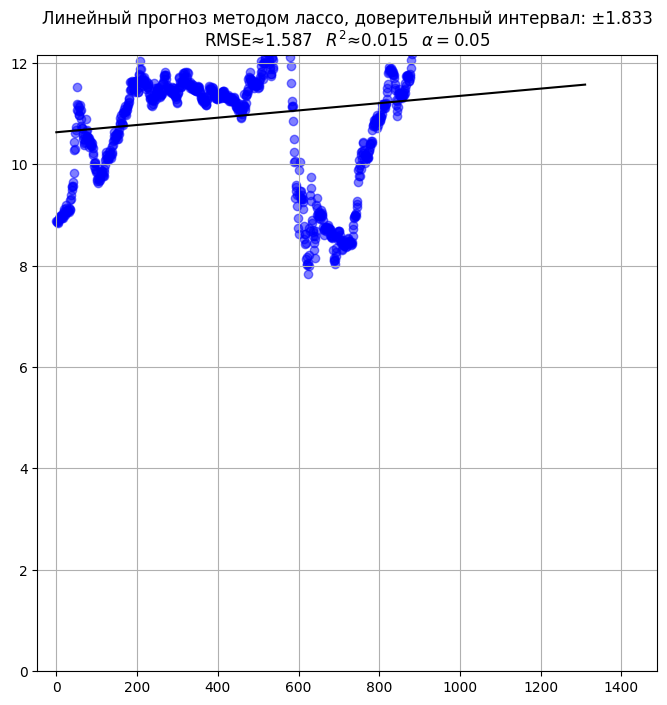

In [713]:
fig, ax = plt.subplots(figsize = (8, 8)) # график, размер в десятках процентов экрана
ax.plot(R, c = 'k') # нарисовать график уравнения регрессии
ax.plot(R+sigm, c = 'r', linestyle ='--') # нарисовать границу прогноза сверху
ax.plot(R-sigm, c = 'r', linestyle ='--') # нарисовать границу прогноза снизу
ax.scatter(X[:n], Y, c ='b', alpha=0.5) # построить точки значений выборки синего цвета
ax.grid() # нарисовать координатную сетку
ax.set_title(t) # подписать заголовок графика
ax.set_xlim(0-int(n*0.05), int((n+fc)*1.05)) # ограничить отображение по оси X (от; до)
ax.set_ylim(0-int(np.max(R)*0.05), np.max(R)*1.05) # отображение по оси Y (от; до)
plt.show()


In [ ]:
X = data['datetime'].astype(int).values.reshape(-1, 1)  # Convert date to timestamp
y = data['Close'].values  # Assuming the column name is USDCNY, adjust if it's different

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
Results = pd.DataFrame(data=y_test)
Results["Predicted Return"] = predictions
Results

In [ ]:
Results[:20].plot(subplots=True)

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(data['datetime'], data['Close'], label='Actual')
plt.scatter(data['datetime'][len(X_train):], predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel(' Exchange Rate')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(
    Results[0],
    Results["Predicted Return"]
)
rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {rmse}")

In [ ]:
# Construct a dataframe using just the "y" training data:
in_sample_results = pd.DataFrame(data=y_train)

# Add a column of "in-sample" predictions to that dataframe:
in_sample_results["In-sample Predictions"] = model.predict(X_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(
    in_sample_results[0],
    in_sample_results["In-sample Predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse = np.sqrt(in_sample_mse)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")